# Myynnin ennustaminen mainonnan perusteella

In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-30 17:40:14.162790


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('https://taanila.fi/Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Dataan tutustumista ja muuntamista

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
# Poistetaan tarpeeton järjestysnumero-sarake
df = df.drop('Unnamed: 0', axis = 1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


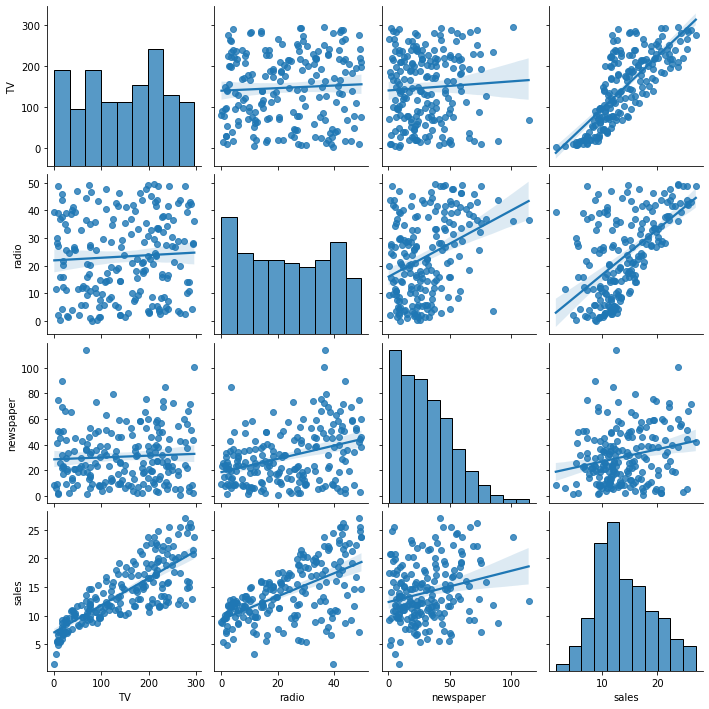

In [6]:
# Riippuvuuksien tarkastelua seaborn-kirjaston hajontakaavioina
sns.pairplot(df, kind = 'reg')

<AxesSubplot:>

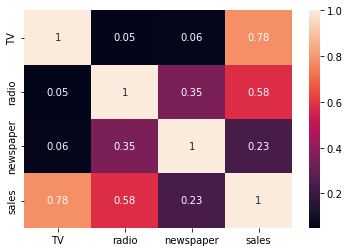

In [7]:
# Riippuvuuksien tarkastelua korrelaatiokertoimien avulla
correlation_matrix = df.corr().round(2)

# Korrelaatioiden taustaväri seaborn-kirjaston heatmap-funktiolla
sns.heatmap(data = correlation_matrix, annot = True)

## Jako opetus- ja testidataan

In [8]:
# Selittävät muuttujat
X = df[['TV', 'radio', 'newspaper']]

# Selitettävä/ennustettava muuttuja
y = df['sales'] 

In [9]:
# Jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Mallit

In [10]:
# Funktio mallin sovittamiseen ja arviointiin

R2_train = []
R2_test = []

def mallinna(malli):
    
    # Mallin sovitus opetusdataan
    malli.fit(X_train, y_train)
            
    # Selityskerroin opetusdatalle
    y_pred_train = malli.predict(X_train)
    R2_train_malli = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_malli,2))
    
    # Selityskerroin testidatalle
    y_pred_test = malli.predict(X_test)
    R2_test_malli = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_malli,2))
    
    # Selityskertoimien tulostus
    print("Opetusdatan selityskerroin :",round(R2_train_malli,2))
    print("Testidatan selityskerroin :",round(R2_test_malli,2))
       
    # Opetusdatan virhetermit kaaviona
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Ennustevirheiden jakauma opetusdatassa')
    sns.histplot((y_train - y_pred_train), kde = True, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # toteutuneet ja ennustetut hajontakaaviona testidatalle
    ax[1].set_title('toteutuneet ja ennustetut testidatassa')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('toteutunut')
    ax[1].set_ylabel('ennuste')

### Lineaarinen regressio

Opetusdatan selityskerroin : 0.9
Testidatan selityskerroin : 0.89


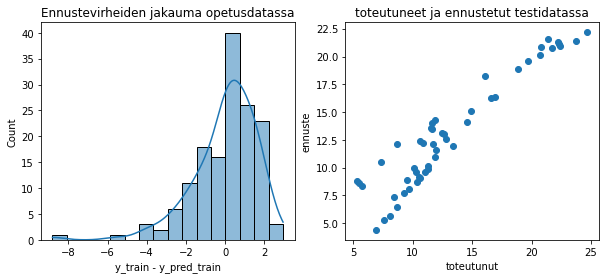

In [11]:
malli = LinearRegression()
mallinna(malli)

### Satunnaismetsä

Opetusdatan selityskerroin : 1.0
Testidatan selityskerroin : 0.98


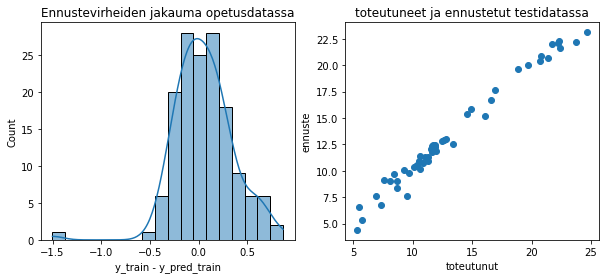

In [12]:
malli = RandomForestRegressor()
mallinna(malli)

### Gradient Boosting

Opetusdatan selityskerroin : 1.0
Testidatan selityskerroin : 0.99


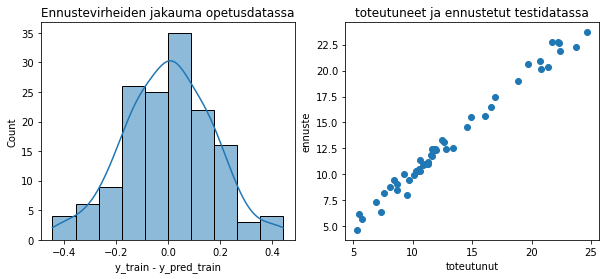

In [13]:
malli = GradientBoostingRegressor()
mallinna(malli)

In [14]:
menetelmä = ["LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor"]
pd.DataFrame({'Malli': menetelmä, 'Selityskerroin (opetusdata)':R2_train, 'Selityskerroin (testidata)':R2_test})

,Malli,Selityskerroin (opetusdata),Selityskerroin (testidata)
0,LinearRegression,0.9,0.89
1,RandomForestRegressor,1.0,0.98
2,GradientBoostingRegressor,1.0,0.99
